<a href="https://colab.research.google.com/github/Shubzzz24/Goeduhub-Datascience-ML/blob/main/Task_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **ASSIGNMENT NO : 7**
## **Reg Id : GO_STP_13238**
## **Author : Shubham Rohidas Hundare**


**Prediction using Supervised Machine Learning using Simple Linear Regression. In this task we have to find the students scores based on their study hours. This is a simple Regression problem type because it has only two variables.** 

## importing required libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Reading Dataset

In [ ]:
df = pd.read_csv('StudentHoursScores.csv')


### Displaying Student Data

In [ ]:
df

,Hours,Scores
0,7.7,79
1,5.9,60
2,4.5,45
3,3.3,33
4,1.1,12
5,8.9,87
6,2.5,21
7,1.9,19
8,2.7,29
9,8.3,81


## Basic properties of data set

**First 5 rows**

In [ ]:
df.head()

,Hours,Scores
0,7.7,79
1,5.9,60
2,4.5,45
3,3.3,33
4,1.1,12


**Last Five rows**

In [ ]:
df.tail()

,Hours,Scores
18,9.6,96
19,4.3,42
20,4.1,40
21,3.0,30
22,2.6,25


**Datatype of columns**

In [ ]:
df.dtypes

Hours     float64
Scores      int64
dtype: object

**Check for duplicat Values**

In [ ]:
df.duplicated().sum()

1

**Check for Null Values**

In [ ]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

**Shape**

In [ ]:
df.shape

(23, 2)

**Size**

In [ ]:
df.size

46

**Columns**

In [ ]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

**Info**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   23 non-null     float64
 1   Scores  23 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 496.0 bytes


## **Statistic OF the Data**

In [ ]:
df.describe()

,Hours,Scores
count,23.000000,23.000000
mean,4.817391,47.695652
std,2.709688,27.103228
min,1.100000,12.000000
25%,2.650000,27.000000
50%,4.100000,40.000000
75%,7.100000,72.500000
max,9.600000,96.000000


## **Correlation of Dataset**

In [ ]:
df.corr()


,Hours,Scores
Hours,1.000000,0.997656
Scores,0.997656,1.000000


## **Reg Plot Graph**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


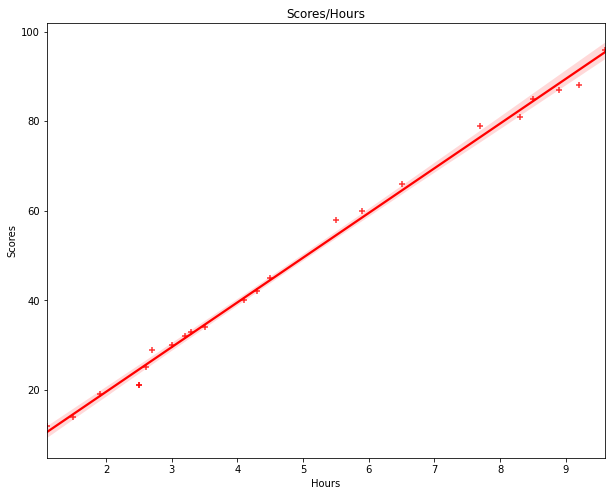

In [ ]:
plt.figure(figsize=(10,8))
 
x = df['Hours']
y = df['Scores']
sns.regplot(x,y,marker='+',color='r')
plt.title("Scores/Hours")
plt.show()

## **Splitting of dependent and independent features**

In [ ]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

## **Splitting train and test data**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
xtrain , xtest , ytrain, ytest = train_test_split(x,y,test_size=0.3,random_state=0)

In [ ]:
xtest.size

7

In [ ]:
xtrain.size

16

In [ ]:
xtest.shape

(7, 1)

In [ ]:
xtrain.shape

(16, 1)

## **Creating and fitting the linear regression model**

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
reg_model = LinearRegression()
reg_model.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
reg_model.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

## **Checking for the intercept (it is a point on y axis where slope of line is passing)**

In [ ]:
reg_model.intercept_

-0.7707902358295513

## **Checking for the slope value(it is a steepness of the line)**

In [ ]:
reg_model.coef_

array([10.04687263])

## **Checking for the data accurecy**

In [ ]:
reg_model.score(xtrain,ytrain)

0.9960578558145138

## **Predicted valu by model**

In [ ]:
y_pred = reg_model.predict(xtest)
y_pred

array([91.66043793, 54.48700921, 29.36982764, 84.62762709, 40.42138753,
       58.50575826, 34.39326396])

## **Creating a dataframe for actual and predicted values**

In [ ]:
new_df = pd.DataFrame({'actual':ytest,'predicted':y_pred})
new_df

,actual,predicted
0,88,91.660438
1,58,54.487009
2,30,29.369828
3,85,84.627627
4,40,40.421388
5,60,58.505758
6,34,34.393264


## **Creating a combine plot (train data, test data, regression line)**

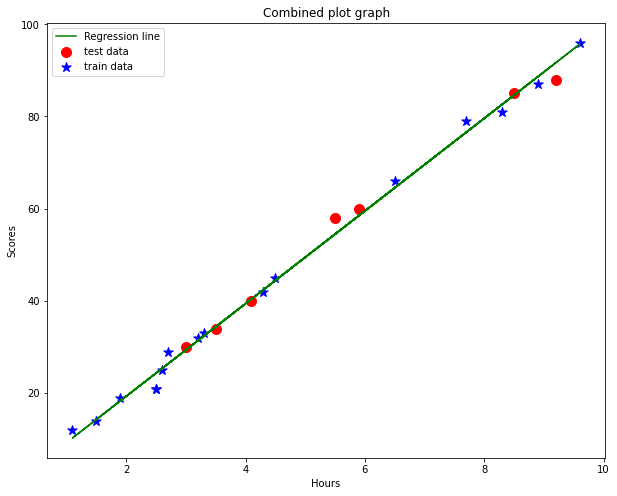

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(xtest,ytest,color='red',label="test data",s=100)
plt.scatter(xtrain,ytrain,color='blue',label="train data",marker='*',s=100)
plt.plot(x,reg_model.predict(x),color='green',label="Regression line")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("Combined plot graph")
plt.legend()
plt.show()

# **Model Evaluation**

## **R2 Score (Coefficient of determination)**

In [ ]:
reg_model.score(xtest,ytest)

0.9912596459046904

## **Mean absolute error**

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_pred,ytest)

1.4978381730972805

## **Mean squared error**

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_pred,ytest)

4.120095895784901

## **Root mean squared error**

In [ ]:
mean_squared_error(y_pred,ytest,squared=False)

2.029801935112119

## **Mean squared log error**

In [ ]:
from sklearn.metrics import mean_squared_log_error
mean_squared_log_error(y_pred,ytest)

0.0009540237616981284

### **Question : What will be predicted score if a student studies for 9.25 hrs/ day?**

## **Predicting Score for 9.25 hrs/ day?**

In [ ]:
reg_model.predict([[9.25]])

array([92.16278156])